In [1]:
import pandas as pd
from bdshare import get_basic_hist_data
import ta 
import numpy as np
date='2022-12-21'

In [2]:
df=get_basic_hist_data('2020-01-01',date,'HRTEX',index='date')

In [3]:
#df1=pd.DataFrame(np.where(df>1,df,np.nan),columns=[df.columns])
#df1.isnull().sum()
#df1

In [4]:
#df1.index=idx
#df1

In [5]:
#df1.isnull().sum()

In [6]:
df=df.bfill()
#df1.isnull().sum()

In [7]:
df

,open,high,low,close,volume
date,,,,,
2020-12-21,39.4,39.4,38.5,39.1,156757
2020-12-22,39.4,39.5,38.0,38.4,226232
2020-12-23,39.0,39.0,38.1,38.2,195111
2020-12-24,39.0,39.0,37.6,37.8,304679
2020-12-27,37.8,38.9,37.8,38.6,169249
...,...,...,...,...,...
2022-12-14,0.0,0.0,0.0,115.9,0
2022-12-15,115.9,115.9,115.9,115.9,450
2022-12-18,115.9,115.9,115.9,115.9,51300


In [8]:
df['SMA200']=ta.trend.sma_indicator(df.close,window=200)
df

,open,high,low,close,volume,SMA200
date,,,,,,
2020-12-21,39.4,39.4,38.5,39.1,156757,NaN
2020-12-22,39.4,39.5,38.0,38.4,226232,NaN
2020-12-23,39.0,39.0,38.1,38.2,195111,NaN
2020-12-24,39.0,39.0,37.6,37.8,304679,NaN
2020-12-27,37.8,38.9,37.8,38.6,169249,NaN
...,...,...,...,...,...,...
2022-12-14,0.0,0.0,0.0,115.9,0,102.9870
2022-12-15,115.9,115.9,115.9,115.9,450,103.2340
2022-12-18,115.9,115.9,115.9,115.9,51300,103.4895


In [9]:
df['RSI']=ta.momentum.rsi(df.close,window=10)

In [10]:
df['Signal']=np.where((df.close>df.SMA200)&(df.RSI<30),True,False)
df[(df.Signal==True)]

,open,high,low,close,volume,SMA200,RSI,Signal
date,,,,,,,,
2021-10-24,65.0,66.0,60.1,61.7,93017,49.8605,24.581564,True
2021-10-25,62.9,65.0,55.7,60.8,55261,49.9690,23.631669,True
2021-11-28,63.7,63.7,59.6,60.7,108837,53.4665,23.030343,True
2021-11-29,0.0,0.0,0.0,60.7,0,53.5950,23.030343,True
2021-11-30,60.0,60.0,54.0,55.4,57292,53.6960,14.911409,True
2021-12-01,55.0,59.9,52.3,56.2,104968,53.7985,19.661418,True
2021-12-02,55.3,56.9,53.0,54.7,82732,53.8925,17.613014,True
2022-05-19,73.9,74.0,71.1,72.5,276765,68.2075,29.093117,True
2022-05-22,72.7,72.7,68.9,69.5,74968,68.2545,19.223960,True


In [11]:
df['SL']=np.where(df.Signal==True,df.close-(df.close-df.low),0)
df['TP']=np.where(df.Signal==True,df.close+(df.close-df.low)*1.5,0)

In [12]:
df=df.dropna()
df

,open,high,low,close,volume,SMA200,RSI,Signal,SL,TP
date,,,,,,,,,,
2021-10-24,65.0,66.0,60.1,61.7,93017,49.8605,24.581564,True,60.1,64.10
2021-10-25,62.9,65.0,55.7,60.8,55261,49.9690,23.631669,True,55.7,68.45
2021-10-26,60.0,64.0,60.0,63.0,84223,50.0920,30.885587,False,0.0,0.00
2021-10-27,64.0,64.4,62.0,62.7,40657,50.2145,30.447394,False,0.0,0.00
2021-10-28,64.4,72.8,63.2,69.3,172158,50.3720,48.357468,False,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
2022-12-14,0.0,0.0,0.0,115.9,0,102.9870,9.892734,True,0.0,289.75
2022-12-15,115.9,115.9,115.9,115.9,450,103.2340,9.892734,True,115.9,115.90
2022-12-18,115.9,115.9,115.9,115.9,51300,103.4895,9.892734,True,115.9,115.90


In [13]:
Buying_dates=[]
Selling_dates=[]
for i in range(len(df)-30):
    if df.Signal.iloc[i]:
        Buying_dates.append(df.iloc[i+1].name)
        for j in range(1,30):
            if df['RSI'].iloc[i+j]>40:
                Selling_dates.append(df.iloc[i+j+1].name)
                break
            elif j==29:
                Selling_dates.append(df.iloc[i+j+1].name)


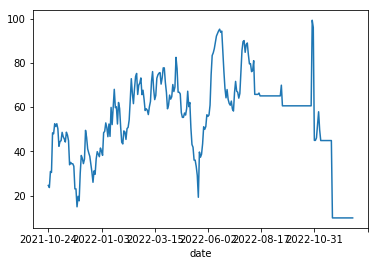

In [14]:
df.RSI.plot()

In [15]:
frame=pd.DataFrame({'Buying_dates':Buying_dates,'Selling_dates':Selling_dates})

In [16]:
frame

,Buying_dates,Selling_dates
0,2021-10-25,2021-10-31
1,2021-10-26,2021-10-31
2,2021-11-29,2021-12-13
3,2021-11-30,2021-12-13
4,2021-12-01,2021-12-13
5,2021-12-02,2021-12-13
6,2021-12-05,2021-12-13
7,2022-05-22,2022-05-29
8,2022-05-23,2022-05-29


In [17]:
actualtrades=frame[frame.Buying_dates>frame.Selling_dates.shift(1)]
actualtrades

,Buying_dates,Selling_dates
2,2021-11-29,2021-12-13
7,2022-05-22,2022-05-29


In [18]:
frame[:1]

,Buying_dates,Selling_dates
0,2021-10-25,2021-10-31


In [19]:
actualtrades=frame[:1].append(actualtrades)
actualtrades

,Buying_dates,Selling_dates
0,2021-10-25,2021-10-31
2,2021-11-29,2021-12-13
7,2022-05-22,2022-05-29


In [20]:
profits=\
df.loc[actualtrades.Selling_dates].close.values-df.loc[actualtrades.Buying_dates].close.values
profits

array([ 8.3, -0.8,  4.3])

In [21]:
relprofit=\
(df.loc[actualtrades.Selling_dates].close.values-df.loc[actualtrades.Buying_dates].close.values)/df.loc[actualtrades.Buying_dates].close.values
relprofit

array([ 0.13651316, -0.01317957,  0.0618705 ])

In [22]:
len([i for i in profits if i>0])

2

In [23]:
len([i for i in profits if i<0])

1

In [24]:
#len([i for i in profits if i>0])/len(profits)#win Rates in 12 years

In [25]:
len(profits)

3

In [26]:
#end of the day my 1 dollar investment by this strategy
(relprofit+1).cumprod()#1.26001532-1=26%

array([1.13651316, 1.1215344 , 1.1909243 ])

In [27]:
def getactuals(df):
    Buying_dates=[]
    Selling_dates=[]
    for i in range(len(df)-30):
        if df.Signal.iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1,30):
                if df['RSI'].iloc[i+j]>40:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j==29:
                    Selling_dates.append(df.iloc[i+j+1].name)
    frame=pd.DataFrame({'Buying_dates':Buying_dates,'Selling_dates':Selling_dates})
    actualtrades=frame[frame.Buying_dates>frame.Selling_dates.shift(1)]
    actualtrades=frame[:1].append(actualtrades)
    return(actualtrades)

In [28]:
def tacalc(df):
    df['SMA200']=ta.trend.sma_indicator(df.close,window=200)
    df['RSI']=ta.momentum.rsi(df.close,window=10)
    df['Signal']=np.where((df.close>df.SMA200)&(df.RSI<25),True,False)
    df['SL']=np.where(df.Signal==True,df.close-(df.close-df.low),0)
    df['TP']=np.where(df.Signal==True,df.close+(df.close-df.low)*1.5,0)

In [29]:
df=get_basic_hist_data('2020-01-01',date,'HRTEX',index='date')
df

,open,high,low,close,volume
date,,,,,
2020-12-21,39.4,39.4,38.5,39.1,156757
2020-12-22,39.4,39.5,38.0,38.4,226232
2020-12-23,39.0,39.0,38.1,38.2,195111
2020-12-24,39.0,39.0,37.6,37.8,304679
2020-12-27,37.8,38.9,37.8,38.6,169249
...,...,...,...,...,...
2022-12-14,0.0,0.0,0.0,115.9,0
2022-12-15,115.9,115.9,115.9,115.9,450
2022-12-18,115.9,115.9,115.9,115.9,51300


In [30]:
tacalc(df)
df

,open,high,low,close,volume,SMA200,RSI,Signal,SL,TP
date,,,,,,,,,,
2020-12-21,39.4,39.4,38.5,39.1,156757,NaN,NaN,False,0.0,0.00
2020-12-22,39.4,39.5,38.0,38.4,226232,NaN,NaN,False,0.0,0.00
2020-12-23,39.0,39.0,38.1,38.2,195111,NaN,NaN,False,0.0,0.00
2020-12-24,39.0,39.0,37.6,37.8,304679,NaN,NaN,False,0.0,0.00
2020-12-27,37.8,38.9,37.8,38.6,169249,NaN,NaN,False,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
2022-12-14,0.0,0.0,0.0,115.9,0,102.9870,9.892734,True,0.0,289.75
2022-12-15,115.9,115.9,115.9,115.9,450,103.2340,9.892734,True,115.9,115.90
2022-12-18,115.9,115.9,115.9,115.9,51300,103.4895,9.892734,True,115.9,115.90


In [31]:
actualtrades=getactuals(df)
actualtrades

,Buying_dates,Selling_dates
0,2021-10-25,2021-10-31
2,2021-11-29,2021-12-13
7,2022-05-23,2022-05-29


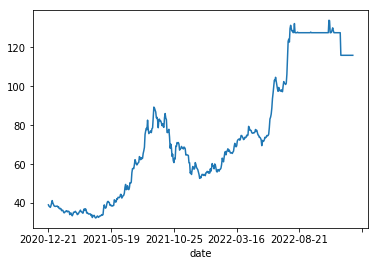

In [32]:
df['close'].plot()

In [33]:
profits=\
df.loc[actualtrades.Selling_dates].close.values-df.loc[actualtrades.Buying_dates].close.values
profits

array([ 8.3, -0.8,  1.6])

In [34]:
relprofit=\
(df.loc[actualtrades.Selling_dates].close.values-df.loc[actualtrades.Buying_dates].close.values)/df.loc[actualtrades.Buying_dates].close.values
relprofit

array([ 0.13651316, -0.01317957,  0.02216066])

In [35]:
relprofit

array([ 0.13651316, -0.01317957,  0.02216066])

In [36]:
relprofit.mean()

0.048498083683586775

In [37]:
(relprofit+1).cumprod()

array([1.13651316, 1.1215344 , 1.14638835])

In [38]:
tic=pd.read_csv('E:\\BD Stocks\\BD Stocks\\BD_stocks.csv')
tic

,Unnamed: 0,Trading code,LTP,Change %,High,Low,Close,YCP,Change,Trade,Value,Volume
0,0,1JANATAMF,6.3,-1.56,6.4,6.3,6.3,6.4,-0.1,75,1.60,250749
1,1,1STPRIMFMF,17.1,-1.72,17.4,17.0,17.1,17.4,-0.3,341,9.32,546325
2,2,AAMRANET,38.2,-0.26,38.5,37.9,38.2,38.3,-0.1,487,18.29,479364
3,3,AAMRATECH,34.4,0.58,34.8,34.0,34.4,34.2,0.2,921,54.41,1583033
4,4,ABB1STMF,5.3,-1.85,5.5,5.2,5.3,5.4,-0.1,237,6.97,1315811
...,...,...,...,...,...,...,...,...,...,...,...,...
381,381,WMSHIPYARD,11.1,-0.89,11.3,11.0,11.1,11.2,-0.1,236,3.52,317011
382,382,YPL,19.3,-1.53,19.7,19.2,19.3,19.6,-0.3,451,25.52,1316121
383,383,ZAHEENSPIN,12.8,0.00,12.8,12.8,12.8,12.8,0.0,31,1.30,101242
384,384,ZAHINTEX,9.0,-1.10,9.1,9.0,9.0,9.1,-0.1,175,5.59,620938


In [39]:
tickers=tic['Trading code'].to_list()
tickers

['1JANATAMF',
 '1STPRIMFMF',
 'AAMRANET',
 'AAMRATECH',
 'ABB1STMF',
 'ABBANK',
 'ACFL',
 'ACI',
 'ACIFORMULA',
 'ACMELAB',
 'ACMEPL',
 'ACTIVEFINE',
 'ADNTEL',
 'ADVENT',
 'AFCAGRO',
 'AFTABAUTO',
 'AGNISYSL',
 'AGRANINS',
 'AIBL1STIMF',
 'AIL',
 'ALARABANK',
 'AL-HAJTEX',
 'ALIF',
 'ALLTEX',
 'AMANFEED',
 'AMBEEPHA',
 'AMCL(PRAN)',
 'ANLIMAYARN',
 'ANWARGALV',
 'AOL',
 'APEXFOODS',
 'APEXFOOT',
 'APEXSPINN',
 'APEXTANRY',
 'APOLOISPAT',
 'APSCLBOND',
 'ARAMIT',
 'ARAMITCEM',
 'ARGONDENIM',
 'ASIAINS',
 'ASIAPACINS',
 'ATCSLGF',
 'ATLASBANG',
 'AZIZPIPES',
 'BANGAS',
 'BANKASIA',
 'BARKAPOWER',
 'BATASHOE',
 'BATBC',
 'BAYLEASING',
 'BBS',
 'BBSCABLES',
 'BDAUTOCA',
 'BDCOM',
 'BDFINANCE',
 'BDLAMPS',
 'BDTHAI',
 'BDTHAIFOOD',
 'BDWELDING',
 'BEACHHATCH',
 'BEACONPHAR',
 'BENGALWTL',
 'BERGERPBL',
 'BEXGSUKUK',
 'BEXIMCO',
 'BGIC',
 'BIFC',
 'BNICL',
 'BPML',
 'BPPL',
 'BRACBANK',
 'BSC',
 'BSCCL',
 'BSRMLTD',
 'BSRMSTEEL',
 'BXPHARMA',
 'BXSYNTH',
 'CAPMBDBLMF',
 'CAPMIBBLMF',
 'CENT

In [40]:
matrixprofit=[]

In [41]:
for i in tickers:
    print(i)
    df=get_basic_hist_data('2020-01-01',date,i,index='date')
    tacalc(df)
    actualtrades=getactuals(df)
    relprofit=\
(df.loc[actualtrades.Selling_dates].close.values-df.loc[actualtrades.Buying_dates].close.values)/df.loc[actualtrades.Buying_dates].close.values
    matrixprofit.append(relprofit)

1JANATAMF
1STPRIMFMF
AAMRANET
AAMRATECH
ABB1STMF
ABBANK
ACFL
ACI
ACIFORMULA
ACMELAB
ACMEPL
ACTIVEFINE
ADNTEL
ADVENT
AFCAGRO
AFTABAUTO
AGNISYSL
AGRANINS
AIBL1STIMF
AIL
ALARABANK
AL-HAJTEX
ALIF
ALLTEX
AMANFEED
AMBEEPHA
AMCL(PRAN)
ANLIMAYARN
ANWARGALV
AOL
APEXFOODS
APEXFOOT
APEXSPINN
APEXTANRY
APOLOISPAT
APSCLBOND
ARAMIT
ARAMITCEM
ARGONDENIM
ASIAINS
ASIAPACINS
ATCSLGF
ATLASBANG
AZIZPIPES
BANGAS
BANKASIA
BARKAPOWER
BATASHOE
BATBC
BAYLEASING
BBS
BBSCABLES
BDAUTOCA
BDCOM
BDFINANCE
BDLAMPS
BDTHAI
BDTHAIFOOD
BDWELDING
BEACHHATCH
BEACONPHAR
BENGALWTL
BERGERPBL
BEXGSUKUK
BEXIMCO
BGIC
BIFC
BNICL
BPML
BPPL
BRACBANK
BSC
BSCCL
BSRMLTD
BSRMSTEEL
BXPHARMA
BXSYNTH
CAPMBDBLMF
CAPMIBBLMF
CENTRALINS
CENTRALPHL
CITYBANK
CITYGENINS
CNATEX
CONFIDCEM
CONTININS
COPPERTECH
CROWNCEMNT
CRYSTALINS
CVOPRL
DACCADYE
DAFODILCOM
DBH
DBH1STMF
DELTALIFE
DELTASPINN
DESCO
DESHBANDHU
DGIC
DHAKABANK
DHAKAINS
DOMINAGE
DOREENPWR
DSHGARME
DSSL
DULAMIACOT
DUTCHBANGL
EASTERNINS
EASTLAND
EASTRNLUB
EBL
EBL1STMF
EBLNRBMF
ECABLES
EGE

In [42]:
matrixprofit

[array([0.03030303]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.03478261]),
 array([-0.01164725]),
 array([], dtype=float64),
 array([0.32510288]),
 array([0.12413793]),
 array([0.01025641]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.0021692 , 0.17060367]),
 array([], dtype=float64),
 array([ 0.14951456, -0.00621762]),
 array([], dtype=float64),
 array([0.09701493, 0.0678733 ]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([-0.08378933]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([-0.04176611]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.2]),
 array([0.01869159, 0.        , 0.00181818]),
 array([-0.16703297]),
 array([], d

In [43]:
for i in matrixprofit:
    print(i)

[0.03030303]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0.03478261]
[-0.01164725]
[]
[0.32510288]
[0.12413793]
[0.01025641]
[]
[]
[0.0021692  0.17060367]
[]
[ 0.14951456 -0.00621762]
[]
[0.09701493 0.0678733 ]
[]
[]
[-0.08378933]
[]
[]
[]
[]
[-0.04176611]
[]
[]
[0.2]
[0.01869159 0.         0.00181818]
[-0.16703297]
[]
[0.16190476]
[]
[]
[]
[]
[]
[]
[]
[]
[-0.00304334]
[]
[]
[]
[-0.05900621]
[]
[0.01328904]
[0.07007576 0.00919118]
[0.03433476]
[]
[]
[]
[]
[-0.06373293]
[0.09090909]
[0.00670094]
[]
[0.0077891  0.04626335]
[-0.01181102]
[0.22807018]
[]
[0.046875]
[]
[-0.07222222]
[]
[0.04352442]
[]
[ 0.06552262  0.01547117 -0.01849218]
[]
[]
[]
[]
[]
[0.]
[]
[0.08395062]
[0.06896552]
[-0.02808989]
[]
[]
[-0.01704545]
[]
[0.16955446 0.09106052]
[]
[]
[]
[]
[]
[0.12643678]
[]
[]
[]
[0.03597122]
[0.07240437]
[]
[0.04424779]
[]
[0.01612903]
[]
[]
[]
[]
[0.07035038]
[]
[]
[]
[]
[]
[0.042]
[]
[-0.02046784  0.07079646  0.10614525]
[-0.02974828]
[]
[0.10632184]
[]
[]
[]
[0.08695652]
[0.19827586]
[0.28571429]

In [44]:
avgs=[]
for i in matrixprofit:
    if len(i)>0:
        avgs.append(i.mean())

In [45]:
avgs

[0.03030303030303033,
 0.0347826086956522,
 -0.011647254575707202,
 0.3251028806584363,
 0.12413793103448281,
 0.01025641025641022,
 0.08638643596882278,
 0.07164847326324268,
 0.08244411427027754,
 -0.08378932968536253,
 -0.041766109785202864,
 0.19999999999999993,
 0.006836590201076183,
 -0.16703296703296708,
 0.16190476190476183,
 -0.003043341378948449,
 -0.059006211180124286,
 0.01328903654485045,
 0.039633467023172934,
 0.034334763948497896,
 -0.06373292867981795,
 0.09090909090909091,
 0.006700941597828049,
 0.027026220231178077,
 -0.011811023622047133,
 0.22807017543859645,
 0.04687499999999997,
 -0.0722222222222222,
 0.043524416135881046,
 0.020833870629274904,
 0.0,
 0.08395061728395058,
 0.06896551724137948,
 -0.02808988764044944,
 -0.017045454545454586,
 0.13030748868890224,
 0.12643678160919558,
 0.03597122302158273,
 0.07240437158469941,
 0.04424778761061947,
 0.016129032258064363,
 0.07035037965419458,
 0.04200000000000003,
 0.052157958438776415,
 -0.029748283752860507,
 

In [46]:
sum(avgs)

7.536159541322469

In [47]:
avg=[]
for i in avgs:
    if i<=0:
        avg.append(i)
    elif i>=0:
        avg.append(i)
    else:
        None
avg

[0.03030303030303033,
 0.0347826086956522,
 -0.011647254575707202,
 0.3251028806584363,
 0.12413793103448281,
 0.01025641025641022,
 0.08638643596882278,
 0.07164847326324268,
 0.08244411427027754,
 -0.08378932968536253,
 -0.041766109785202864,
 0.19999999999999993,
 0.006836590201076183,
 -0.16703296703296708,
 0.16190476190476183,
 -0.003043341378948449,
 -0.059006211180124286,
 0.01328903654485045,
 0.039633467023172934,
 0.034334763948497896,
 -0.06373292867981795,
 0.09090909090909091,
 0.006700941597828049,
 0.027026220231178077,
 -0.011811023622047133,
 0.22807017543859645,
 0.04687499999999997,
 -0.0722222222222222,
 0.043524416135881046,
 0.020833870629274904,
 0.0,
 0.08395061728395058,
 0.06896551724137948,
 -0.02808988764044944,
 -0.017045454545454586,
 0.13030748868890224,
 0.12643678160919558,
 0.03597122302158273,
 0.07240437158469941,
 0.04424778761061947,
 0.016129032258064363,
 0.07035037965419458,
 0.04200000000000003,
 0.052157958438776415,
 -0.029748283752860507,
 

In [48]:
avgdf=pd.DataFrame()
avgdf['avg']=avg
avgdf

,avg
0,0.030303
1,0.034783
2,-0.011647
3,0.325103
4,0.124138
...,...
143,0.147783
144,0.088063
145,0.077101
146,0.233766


In [49]:
len(avgdf[avgdf.avg>0])/len(avgdf)

0.7635135135135135

In [50]:
len(avgdf[avgdf.avg<0])

32

In [51]:
avgdf[avgdf.avg<0].mean()

avg   -0.039946
dtype: float64

In [52]:
avgdf[avgdf.avg>0].mean()

avg    0.078004
dtype: float64

In [53]:
avgdf.mean()

avg    0.05092
dtype: float64

In [54]:
max(avgs)

0.5720257598011524

In [55]:
avgs.index(max(avgs))

60

In [56]:
tickers[73]#max profitable assets

'BSRMLTD'

In [57]:
tickers=tic['Trading code'].to_list()
tickers

['1JANATAMF',
 '1STPRIMFMF',
 'AAMRANET',
 'AAMRATECH',
 'ABB1STMF',
 'ABBANK',
 'ACFL',
 'ACI',
 'ACIFORMULA',
 'ACMELAB',
 'ACMEPL',
 'ACTIVEFINE',
 'ADNTEL',
 'ADVENT',
 'AFCAGRO',
 'AFTABAUTO',
 'AGNISYSL',
 'AGRANINS',
 'AIBL1STIMF',
 'AIL',
 'ALARABANK',
 'AL-HAJTEX',
 'ALIF',
 'ALLTEX',
 'AMANFEED',
 'AMBEEPHA',
 'AMCL(PRAN)',
 'ANLIMAYARN',
 'ANWARGALV',
 'AOL',
 'APEXFOODS',
 'APEXFOOT',
 'APEXSPINN',
 'APEXTANRY',
 'APOLOISPAT',
 'APSCLBOND',
 'ARAMIT',
 'ARAMITCEM',
 'ARGONDENIM',
 'ASIAINS',
 'ASIAPACINS',
 'ATCSLGF',
 'ATLASBANG',
 'AZIZPIPES',
 'BANGAS',
 'BANKASIA',
 'BARKAPOWER',
 'BATASHOE',
 'BATBC',
 'BAYLEASING',
 'BBS',
 'BBSCABLES',
 'BDAUTOCA',
 'BDCOM',
 'BDFINANCE',
 'BDLAMPS',
 'BDTHAI',
 'BDTHAIFOOD',
 'BDWELDING',
 'BEACHHATCH',
 'BEACONPHAR',
 'BENGALWTL',
 'BERGERPBL',
 'BEXGSUKUK',
 'BEXIMCO',
 'BGIC',
 'BIFC',
 'BNICL',
 'BPML',
 'BPPL',
 'BRACBANK',
 'BSC',
 'BSCCL',
 'BSRMLTD',
 'BSRMSTEEL',
 'BXPHARMA',
 'BXSYNTH',
 'CAPMBDBLMF',
 'CAPMIBBLMF',
 'CENT

In [58]:
t=[]
for i in tickers:
    print(i)
    df=get_basic_hist_data('2020-01-01',date,i,index='date')
    tacalc(df)
    try:
        print(df['Signal'][-1:][0])
        if df['Signal'][-1:][0]==True:
            t.append(i)
        else:
            None
    except Exception as ex:
        print(ex)
    

1JANATAMF
False
1STPRIMFMF
False
AAMRANET
False
AAMRATECH
False
ABB1STMF
False
ABBANK
False
ACFL
False
ACI
False
ACIFORMULA
False
ACMELAB
False
ACMEPL
False
ACTIVEFINE
False
ADNTEL
False
ADVENT
False
AFCAGRO
False
AFTABAUTO
False
AGNISYSL
False
AGRANINS
False
AIBL1STIMF
False
AIL
False
ALARABANK
False
AL-HAJTEX
False
ALIF
False
ALLTEX
False
AMANFEED
False
AMBEEPHA
False
AMCL(PRAN)
False
ANLIMAYARN
False
ANWARGALV
False
AOL
False
APEXFOODS
False
APEXFOOT
False
APEXSPINN
False
APEXTANRY
False
APOLOISPAT
False
APSCLBOND
False
ARAMIT
False
ARAMITCEM
False
ARGONDENIM
False
ASIAINS
False
ASIAPACINS
False
ATCSLGF
False
ATLASBANG
False
AZIZPIPES
False
BANGAS
False
BANKASIA
False
BARKAPOWER
False
BATASHOE
False
BATBC
False
BAYLEASING
False
BBS
False
BBSCABLES
False
BDAUTOCA
False
BDCOM
False
BDFINANCE
False
BDLAMPS
False
BDTHAI
False
BDTHAIFOOD
False
BDWELDING
False
BEACHHATCH
False
BEACONPHAR
False
BENGALWTL
False
BERGERPBL
False
BEXGSUKUK
False
BEXIMCO
False
BGIC
False
BIFC
False
BNICL
False


In [59]:
t

['HRTEX']

In [60]:
df=get_basic_hist_data('2020-01-01',date,'HRTEX',index='date')
tacalc(df)
df[-50:]

,open,high,low,close,volume,SMA200,RSI,Signal,SL,TP
date,,,,,,,,,,
2022-10-13,127.5,127.5,127.5,127.5,2760,88.3535,60.583979,False,0.0,0.00
2022-10-16,127.5,127.5,127.5,127.5,75,88.7050,60.583979,False,0.0,0.00
2022-10-17,127.5,127.5,127.5,127.5,1,89.0625,60.583979,False,0.0,0.00
2022-10-18,127.5,127.5,127.5,127.5,6087,89.4265,60.583979,False,0.0,0.00
2022-10-19,127.5,127.5,127.5,127.5,40,89.8005,60.583979,False,0.0,0.00
2022-10-20,127.5,127.5,127.5,127.5,151,90.1700,60.583979,False,0.0,0.00
2022-10-23,127.5,127.5,127.5,127.5,3971,90.5425,60.583979,False,0.0,0.00
2022-10-24,0.0,0.0,0.0,127.5,0,90.9090,60.583979,False,0.0,0.00
2022-10-25,127.5,127.5,127.5,127.5,7370,91.2725,60.583979,False,0.0,0.00


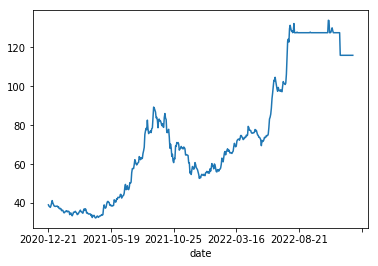

In [61]:
df.close.plot()

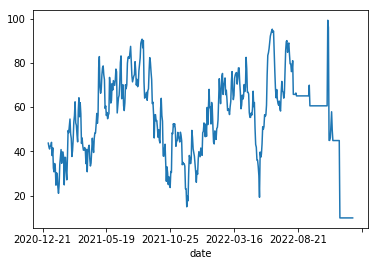

In [62]:
df.RSI.plot()

In [63]:
d=np.array([0.029098 for i in range(164)])
d

array([0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029098,
       0.029098, 0.029098, 0.029098, 0.029098, 0.029098, 0.029

In [64]:
(d+1).cumprod()

array([  1.029098  ,   1.05904269,   1.08985872,   1.12157143,
         1.15420691,   1.18779202,   1.2223544 ,   1.25792247,
         1.29452549,   1.3321936 ,   1.37095777,   1.41084989,
         1.4519028 ,   1.49415027,   1.53762706,   1.58236893,
         1.6284127 ,   1.67579625,   1.72455857,   1.77473978,
         1.82638116,   1.87952519,   1.93421562,   1.99049743,
         2.04841692,   2.10802175,   2.16936097,   2.23248504,
         2.29744589,   2.36429697,   2.43309328,   2.50389143,
         2.57674966,   2.65172792,   2.7288879 ,   2.80829308,
         2.89000879,   2.97410227,   3.0606427 ,   3.14970128,
         3.24135129,   3.33566813,   3.4327294 ,   3.53261496,
         3.63540699,   3.74119006,   3.85005121,   3.96208   ,
         4.0773686 ,   4.19601188,   4.31810743,   4.44375572,
         4.57306012,   4.70612703,   4.84306591,   4.98398944,
         5.12901357,   5.2782576 ,   5.43184434,   5.58990015,
         5.75255506,   5.91994291,   6.09220141,   6.26